In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [195]:
def benchmarkErrorRate(trainTarget,testTarget): 
    return sum(testTarget != trainTarget.value_counts().argmax())/len(testTarget)
def confusionMatrix(predictions, observations): 
    return pd.crosstab(pd.Series(predictions).rename('Predictions'),testTarget.rename('Observations').reset_index(drop=True))

In [196]:
from sklearn import neighbors

# Load

In [197]:
df = pd.read_csv('../data/iris.csv')

# Manage

Here, the types of each column are already correct, so we don't need to do any typecasting. It's worth exploring the data a little bit to see what we're dealing with.

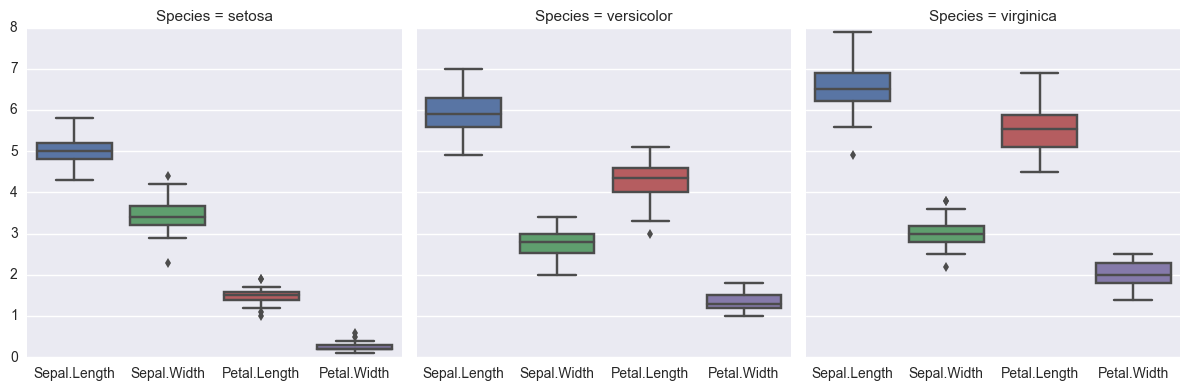

In [198]:
sns.factorplot(data=df,col='Species',kind='box')

# Partition

In [199]:
train = df.sample(frac=0.8)
test = df.drop(train.index)

trainTarget = train.pop('Species')
testTarget = test.pop('Species')

# Build

In [200]:
model = neighbors.KNeighborsClassifier(n_neighbors=15)
model.fit(train,target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=15, p=2,
           weights='uniform')

# Predict

In [201]:
predictions = model.predict(test)

# Evaluate

In [209]:
error_rate = sum(predictions != testTarget)/len(predictions)
bench_rate = benchmarkErrorRate(trainTarget,testTarget)
print('Error rate: ', error_rate)
print('Benchmark: ',bench_rate)

Error rate:  0.566666666667
Benchmark:  0.733333333333


In [204]:
confusion_matrix = confusionMatrix(predictions,testTarget)
confusion_matrix

Observations,setosa,versicolor,virginica
Predictions,,,
setosa,5,1,6
versicolor,0,7,4
virginica,3,3,1


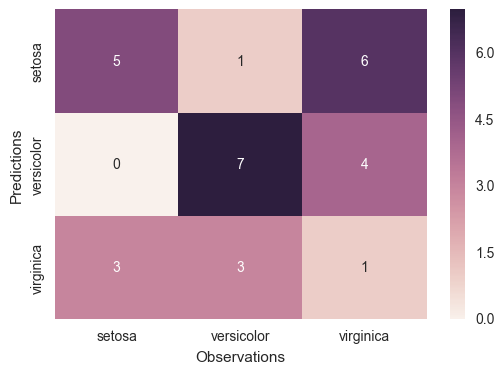

In [210]:
sns.heatmap(confusion_matrix,annot=True)